## 모의고사 2-2 정형데이터 마이닝

### Q1 문제

In [89]:
#---------------------------------------------------------------------------------------
# Q1) cabib, embarked변수의 값 중 ""로 처리된 값을 NA로 바꾸고 아래의 데이터 테이블을 보고 
#     문자형, 범주형 변수들을 각각 character, factor형으로 변환하시오.
#     또, 수치형 변수가 NA인 값을 중앙값으로 대체하고, 범주형 변수가 NA인 값을 최빈값으로 대체하고
#     age변수를 아래의 표와 같이 구간화하여 age_1이라는 변수를 생성하고 추가하시오. 
#---------------------------------------------------------------------------------------

In [90]:
path = "./titanic.csv"

In [91]:
import pandas as pd
df = pd.read_csv(path)

In [92]:
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1046 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   ticket    1309 non-null   object 
 8   fare      1308 non-null   float64
 9   cabin     295 non-null    object 
 10  embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [94]:
#df_t.loc[df_t['embarked'].isna(),['embarked']] = "NA"
#df_t.loc[df_t['cabin'].isna(),['cabin']] = "NA"

In [95]:
df.isna().sum()

pclass         0
survived       0
name           0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           1
cabin       1014
embarked       2
dtype: int64

In [96]:
df_t = df
import math
df_t['age_1'] = df_t['age']
df_t['age_1'].fillna(df_t['age'].median(), inplace=True)
df_t['age_1'] = df_t['age_1'].map(lambda x: math.floor(x/10))
df_t['age_1']

0       2
1       0
2       0
3       3
4       2
       ..
1304    1
1305    2
1306    2
1307    2
1308    2
Name: age_1, Length: 1309, dtype: int64

In [97]:
df_t['fare'].fillna(df_t['fare'].median(), inplace = True)
df_t['cabin'].fillna(df_t['cabin'].describe().top, inplace = True)
df_t['embarked'].fillna(df_t['embarked'].describe().top, inplace = True)

In [98]:
df_t.isna().sum()

pclass        0
survived      0
name          0
sex           0
age         263
sibsp         0
parch         0
ticket        0
fare          0
cabin         0
embarked      0
age_1         0
dtype: int64

### Q2~3 문제

In [99]:
#---------------------------------------------------------------------------------------
# Q2) 전처리가 완료된 titanic 데이터를 train(70%), test(30%) 데이터로 분할하시오.
#    (set.seed(12345)를 실행한 후 데이터를 분할하시오.) 
#    또, train 데이터로 종속변수인 survived(생존 여부)를 독립변수 pclass, sex, sibsp, parch, 
#    fare, embarked로 지정하여 예측하는 분류모델을 3개 이상 생성하고 test 데이터에 대한 
#    예측값을 csv파일로 각각 제출하시오.
#---------------------------------------------------------------------------------------
#---------------------------------------------------------------------------------------
# Q3) 생성된 3개의 분류모델에 대해 성과분석을 실시하여 정확도를 비교하여 설명하시오. 
#     또, ROC curve를 그리고 AUC값을 산출하시오.
#---------------------------------------------------------------------------------------

In [131]:
#범주형 또는 문자형 독립변수
dummy_columns = ['sex','embarked','pclass']

#종속_독립변수
X_columns = ['survived','pclass','sex','sibsp','parch','fare','embarked']

In [132]:
df_dummies = pd.get_dummies(df_t[X_columns], columns=dummy_columns)
df_dummies

,survived,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,pclass_1,pclass_2,pclass_3
0,1,0,0,211.3375,1,0,0,0,1,1,0,0
1,1,1,2,151.5500,0,1,0,0,1,1,0,0
2,0,1,2,151.5500,1,0,0,0,1,1,0,0
3,0,1,2,151.5500,0,1,0,0,1,1,0,0
4,0,1,2,151.5500,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0,1,0,14.4542,1,0,1,0,0,0,0,1
1305,0,1,0,14.4542,1,0,1,0,0,0,0,1
1306,0,0,0,7.2250,0,1,1,0,0,0,0,1
1307,0,0,0,7.2250,0,1,1,0,0,0,0,1


In [133]:
y = df_dummies[['survived']]
X = df_dummies.drop(columns = ['survived'])

In [134]:
# 훈련셋 평가셋 분리하기
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=0.7,
                                                   test_size = 0.3, random_state=12345)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(916, 11) (393, 11) (916, 1) (393, 1)


#### 방법1 로지스틱 회귀분석

In [135]:
# 로지스틱회귀모형 모델링
import statsmodels.api as sm
model = sm.Logit(y_train, X_train)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.479613
         Iterations 6


In [136]:
import time
import itertools
def processSubset(X,y, feature_set):
            model = sm.Logit(y,X[list(feature_set)]) # Modeling
            regr = model.fit() # 모델 학습
            AIC = regr.aic # 모델의 AIC
            return {"model":regr, "AIC":AIC}
        
'''
전진선택법
'''
def forward(X, y, predictors):
    
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in X.columns if p not in predictors]
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X, y= y, feature_set=predictors+[p]))
        
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)

    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()] # index

    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in")
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

'''
후진소거법
'''
def backward(X,y,predictors):
    tic = time.time()
    results = []
    
    # 데이터 변수들이 미리정의된 predictors 조합 확인
    for combo in itertools.combinations(predictors, len(predictors) - 1):
        results.append(processSubset(X=X, y= y,feature_set=list(combo)))
    models = pd.DataFrame(results)
    
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors) - 1, "predictors in",
          (toc - tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model



'''
단계적 선택법
'''

def Stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    predictors = [X.columns[0]]
    Smodel_before = processSubset(X,y,predictors)['AIC']
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns) + 1):
        Forward_result = forward(X=X, y=y, predictors=predictors) # constant added
        print('forward')
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors]
        Backward_result = backward(X=X, y=y, predictors=predictors)
        if Backward_result['AIC']< Forward_result['AIC']:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]["model"].model.exog_names
            Smodel_before = Stepmodels.loc[i]["AIC"]
            predictors = [ k for k in predictors]
            print('backward')
        if Stepmodels.loc[i]['AIC']> Smodel_before:
            break
        else:
            Smodel_before = Stepmodels.loc[i]["AIC"]
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Stepmodels['model'][len(Stepmodels['model'])])

In [137]:
Stepwise_best_model = Stepwise_model(X_train,y_train)

Optimization terminated successfully.
         Current function value: 0.682702
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.681747
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.673164
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.625896
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.569038
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.678307
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.677260
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.654536
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.671330
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.682653
  

Optimization terminated successfully.
         Current function value: 0.479904
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.479904
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.483628
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.488280
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.479904
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.479904
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.479904
         Iterations 6
Processed  7 models on 6 predictors in 0.031239032745361328
Selected predictors: ['sex_male', 'pclass_1', 'pclass_2', 'embarked_C', 'sibsp', 'sex_female']  AIC: <statsmodels.discrete.discrete_model.BinaryResultsWrapper object at 0x7f94089dfdd0>
backward
Optimization terminated successf

In [138]:
Stepwise_best_model.aic

891.1845069863512

In [139]:
Stepwise_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                  916
Model:                          Logit   Df Residuals:                      910
Method:                           MLE   Df Model:                            5
Date:                Sun, 09 Jan 2022   Pseudo R-squ.:                  0.2784
Time:                        14:52:18   Log-Likelihood:                -439.59
converged:                       True   LL-Null:                       -609.21
Covariance Type:            nonrobust   LLR p-value:                 3.619e-71
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sex_male      -2.1563      0.162    -13.329      0.000      -2.473      -1.839
pclass_1       1.5013      0.209      7.188      0.000       1.092       1.911
pclass_2       1.0359      0.209      4.951      0.000       0.626       1.446
embarked_C     0.8398      0.214      3.918      0.000       0.420       1.260
sibsp         -0.2382      0.097     -2.451      0.014      -0.429      -0.048
sex_female     0.2850      0.167      1.707      0.088      -0.042       0.612
==============================================================================
"""

In [140]:
y_test_predict = round(Stepwise_best_model.predict(X_test[Stepwise_best_model.params.index]))
y_test_predict

518     0.0
135     1.0
586     1.0
621     1.0
1188    1.0
       ... 
1005    0.0
1088    0.0
778     1.0
650     1.0
1255    0.0
Length: 393, dtype: float64

In [142]:
import numpy as np
np.exp(Stepwise_best_model.params)

sex_male      0.115755
pclass_1      4.487363
pclass_2      2.817707
embarked_C    2.315800
sibsp         0.788063
sex_female    1.329756
dtype: float64

##### 방법1 로지스틱 회귀분석 해설
다항 로지스틱회귀 방법으로 모델 적합을 실시함  
종속 변수는 survived  
독립 변수는 단계적 변수 선택법으로 survived ~ 1 상수항 모델에서부터 AIC 벌점을 최소화 하는 방향으로 변수를 하나씩 추가 및 삭제  
sex_female을 제외하고 모두 독립변수의 유의도가 0.05 수준에서 귀무 가설을 기각하므로, 모두 유의하다고 할 수 있음 (sex_female 제외)  
해당 모델에서 가장 영향력이 큰 독립변수는 sex_male이며, sex가 male인 경우 (0->1) 그렇지 않은 경우에 비해서, survived 확률이 약 82% 감소함  

In [152]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
# 혼동행렬
cm = confusion_matrix(y_test,y_test_predict)
print(cm)

[[208  35]
 [ 37 113]]


In [151]:
print("Acuuracy : ", accuracy_score(y_test, y_test_predict))
print("Sensitivity(recall) : ", recall_score(y_test, y_test_predict))
print("precision_score : ", precision_score(y_test, y_test_predict))
print("f1_score : ", f1_score(y_test, y_test_predict))

Acuuracy :  0.816793893129771
Sensitivity(recall) :  0.7533333333333333
precision_score :  0.7635135135135135
f1_score :  0.7583892617449665


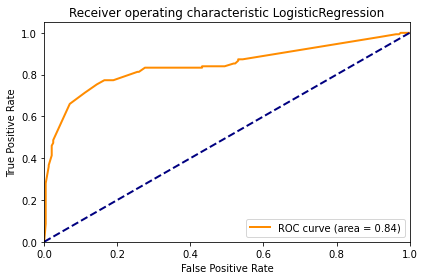

In [149]:
# 확률로 예측하기
y_pred_proba = Stepwise_best_model.predict(X_test[Stepwise_best_model.params.index])

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# ROC 커브 시각화

def draw_roc(test_y, pred_y, model_name):
    fpr, tpr, thr = roc_curve(test_y, pred_y)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color = 'darkorange',
            lw = lw, label = "ROC curve (area = %0.2f)" % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic {}".format(model_name))
    plt.legend(loc='lower right')
    plt.ion()
    plt.tight_layout()
    plt.show()
draw_roc(y_test, y_pred_proba, "LogisticRegression")

In [150]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_pred_proba)

0.8433333333333333

##### 방법1 로지스틱 회귀분석 성과분석
정분류율: 82%  
민감도: 75%  
정확도: 76%  
f1: 76%  
roc_auc 면적: 0.84  

#### 방법2 랜덤포레스트

#### 방법3 의사결정나무

In [154]:
# sklearn 모듈의 tree import
from sklearn import tree

# 간단한 데이터셋 생성

# 의사결정나무 적합 및 학습데이터 예측
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.predict(X_test)

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,

In [157]:
# 시각화
dot_data = tree.export_graphviz(clf,   # 의사결정나무 모형 대입
                               out_file = None,  # file로 변환할 것인가
                               feature_names = X.columns,  # feature 이름
                               class_names = y.columns,  # target 이름
                               filled = True,           # 그림에 색상을 넣을것인가
                               rounded = True,          # 반올림을 진행할 것인가
                               special_characters = True)   # 특수문자를 사용하나

graph = graphviz.Source(dot_data)              
graph

IndexError: index 1 is out of bounds for axis 0 with size 1